# Practice Assignment: Understanding Distributions Through Sampling

** *This assignment is optional, and I encourage you to share your solutions with me and your peers in the discussion forums!* **


To complete this assignment, create a code cell that:
* Creates a number of subplots using the `pyplot subplots` or `matplotlib gridspec` functionality.
* Creates an animation, pulling between 100 and 1000 samples from each of the random variables (`x1`, `x2`, `x3`, `x4`) for each plot and plotting this as we did in the lecture on animation.
* **Bonus:** Go above and beyond and "wow" your classmates (and me!) by looking into matplotlib widgets and adding a widget which allows for parameterization of the distributions behind the sampling animations.


Tips:
* Before you start, think about the different ways you can create this visualization to be as interesting and effective as possible.
* Take a look at the histograms below to get an idea of what the random variables look like, as well as their positioning with respect to one another. This is just a guide, so be creative in how you lay things out!
* Try to keep the length of your animation reasonable (roughly between 10 and 30 seconds).

<IPython.core.display.Javascript object>


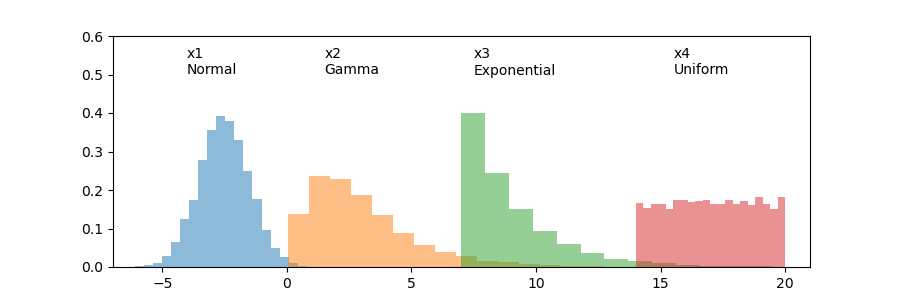

Text(15.522167256517736, 0.5, 'x4\nUniform')

In [2]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)

# plot the histograms
plt.figure(figsize=(9,3))
plt.hist(x1, density=True, bins=20, alpha=0.5)
plt.hist(x2, density=True, bins=20, alpha=0.5)
plt.hist(x3, density=True, bins=20, alpha=0.5)
plt.hist(x4, density=True, bins=20, alpha=0.5);
plt.axis([-7,21,0,0.6])

plt.text(x1.mean()-1.5, 0.5, 'x1\nNormal')
plt.text(x2.mean()-1.5, 0.5, 'x2\nGamma')
plt.text(x3.mean()-1.5, 0.5, 'x3\nExponential')
plt.text(x4.mean()-1.5, 0.5, 'x4\nUniform')

## Libraries

In [138]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt, animation, gridspec
import seaborn as sns

%matplotlib gtk4

## Update function (Animation)

<IPython.core.display.Javascript object>


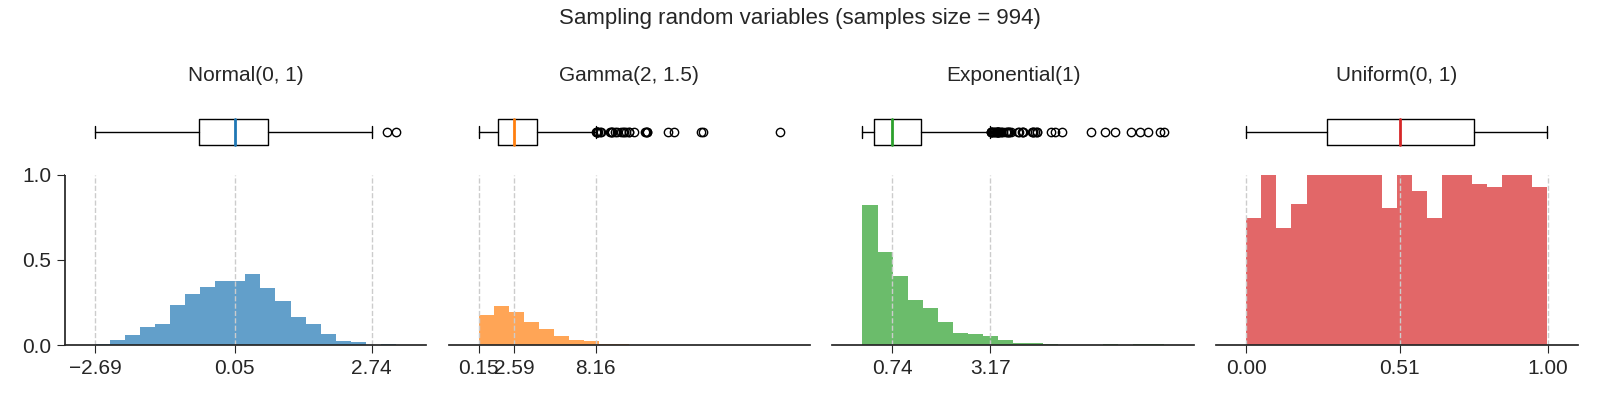

In [341]:
#----------- Random Variables ----------#

max_sample_size = int(1e3)
samples_params = [
        {'loc': 0, 'scale': 1},   # Normal
        {'a': 2, 'scale': 1.5}, # Gamma
        {'scale': 1},   # Exponential
        {'loc': 0, 'scale': 1}    # Uniform
    ]
samples_func = [stats.norm, stats.gamma, stats.expon, stats.uniform]
samples = [samples_func[i].rvs(**samples_params[i], size = max_sample_size) for i in range(4)]
titles = ['Normal', 'Gamma', 'Exponential', 'Uniform']

#---------------- Style ----------------#

fig = plt.figure(figsize = (16, 4), dpi = 100)

# Font size
plt.rcParams.update({
    'font.size': 15,
    'figure.autolayout': True
})

plt.style.use('seaborn-ticks')

#----------- Video variables -----------#

total_time = 10 # seconds
fps = 15 # frame per second
total_frames = fps * total_time
gen_frames = range(0, total_frames, 1)

def update_figure(frame):    
    # Sample size
    sample_size = int(100 + (900/total_frames) * frame)

    #--------- Set figure and axis ---------#

    plt.clf()
    plt.suptitle(f'Sampling random variables (samples size = {sample_size:n})', fontsize = 16)
    gs = fig.add_gridspec(ncols = 4, nrows = 3, figure = fig, hspace = 0)

    # Histograms
    axs_hist = [fig.add_subplot(gs[1:3, i]) for i in range(4)]

    # Box and whisker plots
    axs_box = [fig.add_subplot(gs[0, i]) for i in range(4)]
    
    #---------- Sticks and Spines ----------#

    for i in range(4):
        # Box and whisker plots
        axs_box[i].spines[:].set_visible(False)
        axs_box[i].set_yticks([], label = [''], linewidth = 0)
        axs_box[i].set_xticks([])
        axs_box[i].tick_params(left = False, right = False, bottom = False, top = False)
        axs_box[i].get_yaxis().set_visible(False)

        # Histograms
        axs_hist[i].spines[['top', 'right']].set_visible(False)
        if i > 0: 
            axs_hist[i].spines['left'].set_visible(False)
            axs_hist[i].yaxis.set_tick_params(left = False, labelleft = False)

        #axs_hist[i].xaxis.set_tick_params(labelsize = 14)
        axs_hist[i].grid(linestyle = "--", axis = 'x', linewidth = 1, zorder = 1)

    #-------- Setting Axes and Plots -------#

    for i in range(4):
        #---------------Title --------------#
        title = titles[i]
        title += "("
        for idx, param in enumerate(samples_params[i].values()):
            if idx == 0: title += str(param)
            else: title += ', ' + str(param)
        title += ")"
        
        #----- Quantiles, and Extremes -----#
        min_sample = min(samples[i][:sample_size])
        max_sample = max(samples[i][:sample_size])
        Q1, Q2, Q3 = (np.quantile(samples[i][:sample_size], q) for q in [0.25, 0.50, 0.75])
        I = Q3 - Q1

        #------------- Whiskers ------------#

        whis = [
            Q1 - 1.5*I if (Q1 - 1.5*I) >= min_sample else min_sample,
            Q3 + 1.5*I if (Q3 + 1.5*I) <= max_sample else max_sample
        ]
        
        sorted_sample = sorted(samples[i][:sample_size])
        
        for sample in sorted_sample:
            if sample >= whis[0]:
                whis[0] = sample
                break
                
        for idx, sample in enumerate(sorted_sample):
            if sample > whis[1]:
                whis[1] = sorted_sample[idx - 1]
                break
            
            elif sample == whis[1]:
                whis[1] = sample
                break
            

        #--------------- Plots -------------#

        axs_box[i].boxplot(
            samples[i][:sample_size], 
            widths = 0.3, 
            vert = False,
            medianprops = {
                'color': sns.color_palette()[i],
                'linewidth': 2
            }
        )

        axs_hist[i].hist(
            samples[i][:sample_size],
            density = True,
            bins = 20, 
            zorder = 0,
            color = sns.color_palette()[i],
            alpha = 0.7
        )

        #--------------- Title -------------#

        axs_box[i].set_title(title, fontsize = 15)

        #----------- X and Y ticks ---------#

        # histogram and boxplot x-ticks
        if i != 2: axs_hist[i].set_xticks([round(whis[0], 2), round(Q2, 2), round(whis[1], 2)])
        else: axs_hist[i].set_xticks([round(Q2, 2), round(whis[1], 2)])

        # Histograms y-ticks
        axs_hist[i].set_yticks([0, 0.5, 1])

        # X and Y limits
        xlim = (
            min_sample + (min_sample - max_sample) * 0.1,
            max_sample + (max_sample - min_sample) * 0.1,
        )

        axs_box[i].set_xlim(xlim)
        axs_hist[i].set_xlim(xlim)
        axs_hist[i].set_ylim(0, 1)

    # Layout
    #gs.update(wspace = 0.15)
    fig.tight_layout()

# Execute Animation    
update_figure(total_frames)
video = animation.FuncAnimation(fig, update_figure, interval = 50, frames = frames, repeat = False, save_count = fps * total_time)

# Save the animation as a video using the FFMpeg codec
#video.save("sampling_animation.mp4", writer = animation.FFMpegWriter(fps = fps))